In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")


All libraries imported successfully!


In [2]:
# 2. Load df_selected_05.pkl
with open('../../data/processed/df_selected_05.pkl', 'rb') as f:
    df = pickle.load(f)

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nDataset info:")
print(df.info())


Dataset loaded successfully!
Dataset shape: (1460, 16)
Columns: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'EffectiveAge', 'Quality_x_Area', 'AvgRoomSize', 'IsNewBuild', 'TotalSF', 'GarageRatio', 'SalePrice', 'AboveGradeBath', 'BasementBath']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OverallQual     1460 non-null   int64   
 1   GrLivArea       1460 non-null   int64   
 2   GarageCars      1460 non-null   int64   
 3   GarageArea      1460 non-null   int64   
 4   TotalBsmtSF     1460 non-null   int64   
 5   1stFlrSF        1460 non-null   int64   
 6   TotRmsAbvGrd    1460 non-null   int64   
 7   EffectiveAge    1460 non-null   int64   
 8   Quality_x_Area  1460 non-null   int64   
 9   AvgRoomSize     1460 non-null   float64 
 10  IsNewBuild      1460 

In [3]:
# 3. Define X (features) and y (target)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature columns:")
for i, col in enumerate(X.columns):
    print(f"{i+1:2d}. {col}")

print(f"\nTarget variable: SalePrice")
print(f"Target statistics:")
print(y.describe())


Features (X) shape: (1460, 15)
Target (y) shape: (1460,)

Feature columns:
 1. OverallQual
 2. GrLivArea
 3. GarageCars
 4. GarageArea
 5. TotalBsmtSF
 6. 1stFlrSF
 7. TotRmsAbvGrd
 8. EffectiveAge
 9. Quality_x_Area
10. AvgRoomSize
11. IsNewBuild
12. TotalSF
13. GarageRatio
14. AboveGradeBath
15. BasementBath

Target variable: SalePrice
Target statistics:
count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64


In [4]:
# 4. GridSearchCV for Ridge Regression with 5-Fold Cross Validation

# Define alpha parameter grid
alpha_grid = np.logspace(-4, 4, 50)  # From 0.0001 to 10000
print(f"Testing {len(alpha_grid)} alpha values from {alpha_grid.min():.4f} to {alpha_grid.max():.0f}")

# Initialize Ridge regression
ridge = Ridge()

# Setup GridSearchCV with 5-fold cross validation
param_grid = {'alpha': alpha_grid}
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
print("Starting GridSearchCV...")
grid_search.fit(X, y)

# Get the best parameters and score
best_alpha = grid_search.best_params_['alpha']
best_score = -grid_search.best_score_  # Convert back to positive MSE

print(f"\n" + "="*60)
print(f"Grid Search Results:")
print(f"="*60)
print(f"Best Alpha: {best_alpha:.6f}")
print(f"Best Cross-validation MSE: {best_score:.6f}")
print(f"Best Cross-validation RMSE: {np.sqrt(best_score):.6f}")
print(f"="*60)


Testing 50 alpha values from 0.0001 to 10000
Starting GridSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Grid Search Results:
Best Alpha: 5.428675
Best Cross-validation MSE: 0.029073
Best Cross-validation RMSE: 0.170509


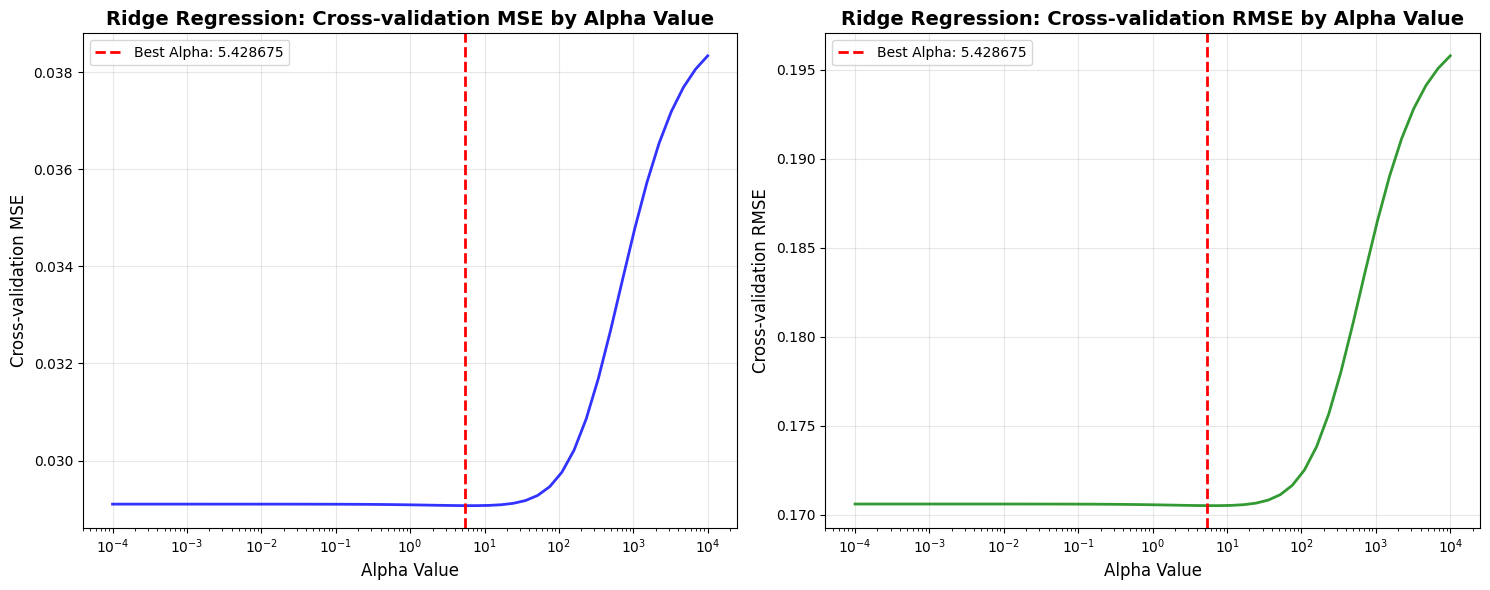

Alpha range tested: 0.000100 to 10000
Minimum MSE: 0.029073 at alpha = 5.428675
Minimum RMSE: 0.170509 at alpha = 5.428675


In [5]:
# 5. Alpha Performance Visualization

# Extract cross-validation scores for all alpha values
cv_results = grid_search.cv_results_
alphas = cv_results['param_alpha']
mse_scores = -cv_results['mean_test_score']  # Convert to positive MSE
rmse_scores = np.sqrt(mse_scores)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: MSE by Alpha Value
ax1.plot(alphas, mse_scores, 'b-', linewidth=2, alpha=0.8)
ax1.axvline(x=best_alpha, color='red', linestyle='--', linewidth=2, 
           label=f'Best Alpha: {best_alpha:.6f}')
ax1.set_xscale('log')
ax1.set_xlabel('Alpha Value', fontsize=12)
ax1.set_ylabel('Cross-validation MSE', fontsize=12)
ax1.set_title('Ridge Regression: Cross-validation MSE by Alpha Value', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: RMSE by Alpha Value
ax2.plot(alphas, rmse_scores, 'g-', linewidth=2, alpha=0.8)
ax2.axvline(x=best_alpha, color='red', linestyle='--', linewidth=2, 
           label=f'Best Alpha: {best_alpha:.6f}')
ax2.set_xscale('log')
ax2.set_xlabel('Alpha Value', fontsize=12)
ax2.set_ylabel('Cross-validation RMSE', fontsize=12)
ax2.set_title('Ridge Regression: Cross-validation RMSE by Alpha Value', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Print some additional statistics
print(f"Alpha range tested: {alphas.min():.6f} to {alphas.max():.0f}")
print(f"Minimum MSE: {mse_scores.min():.6f} at alpha = {alphas[np.argmin(mse_scores)]:.6f}")
print(f"Minimum RMSE: {rmse_scores.min():.6f} at alpha = {alphas[np.argmin(rmse_scores)]:.6f}")


Training samples: 1168
Test samples: 292
Best alpha value: 5.428675


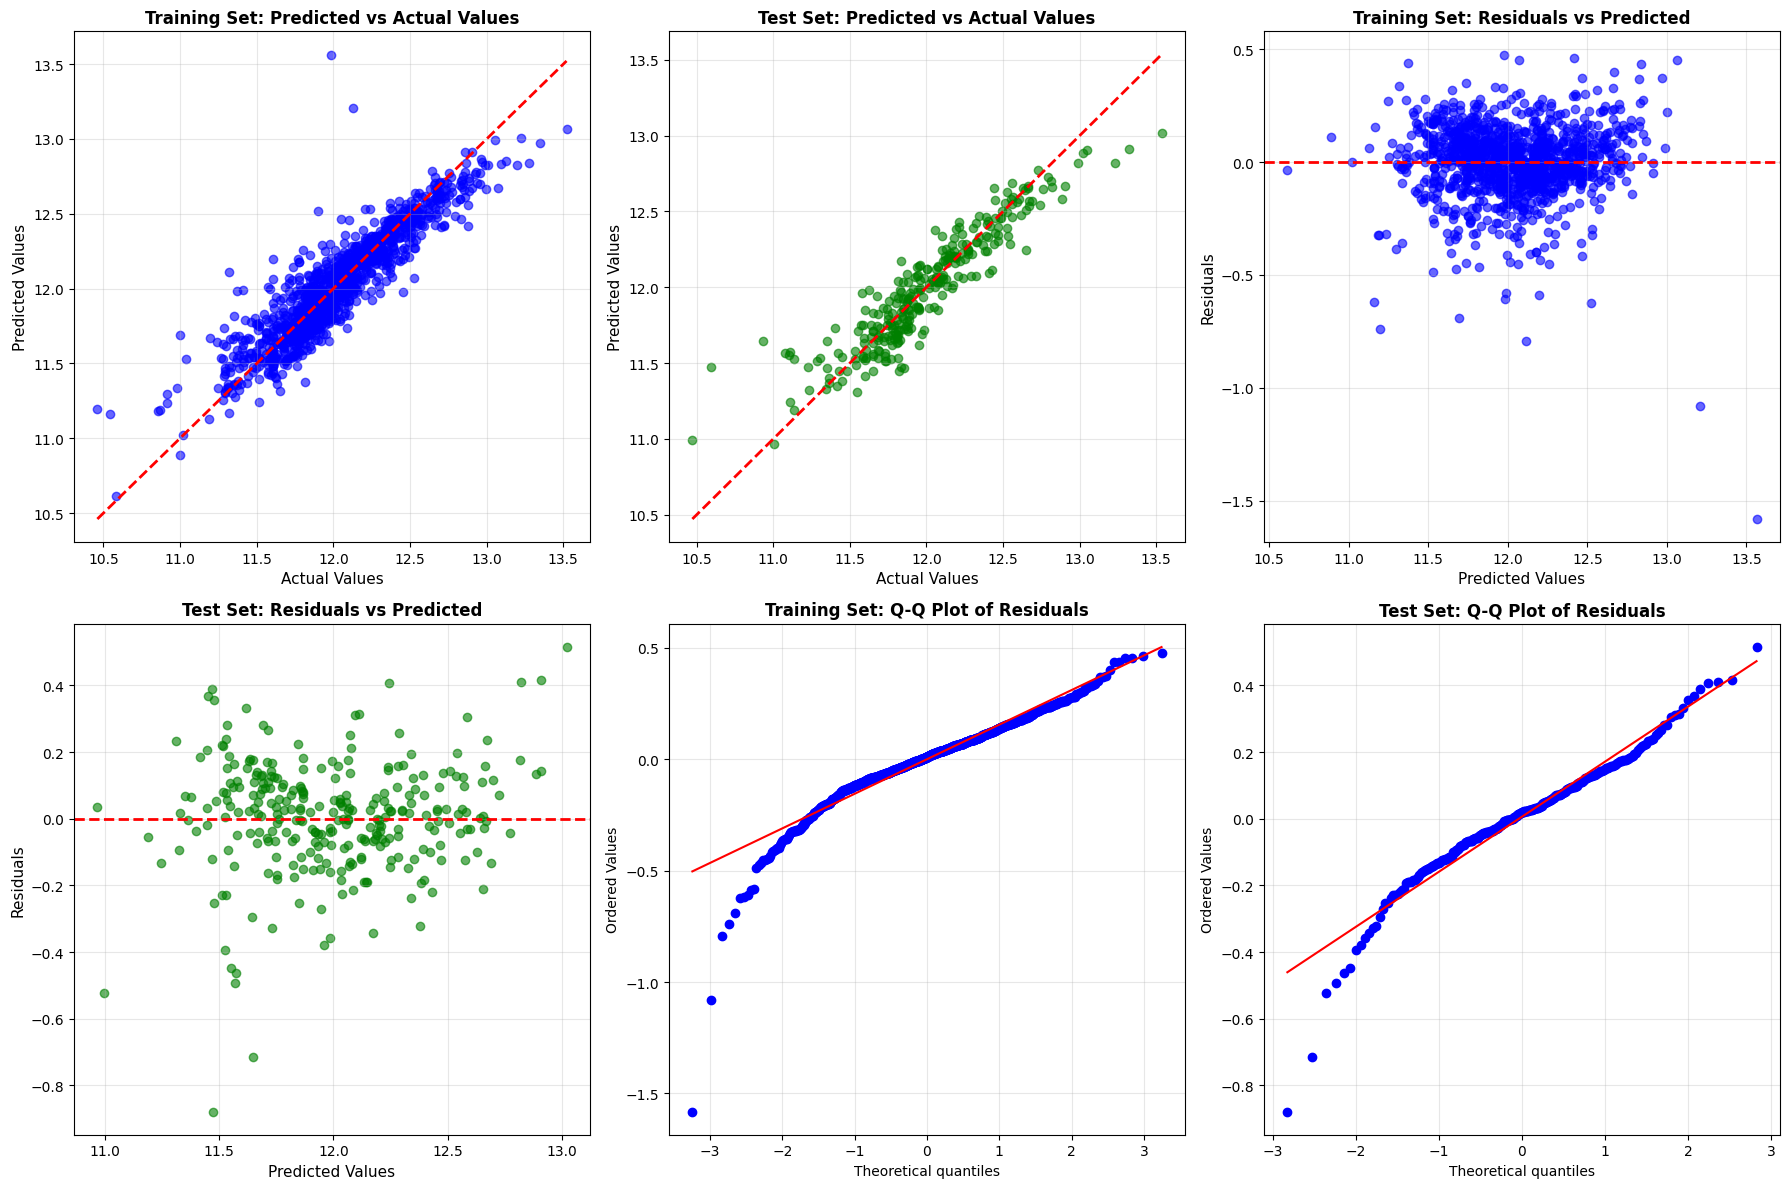


Model Performance Metrics:
Training R²: 0.8273
Test R²: 0.8472
Training RMSE: 0.1623
Test RMSE: 0.1689


In [6]:
# 6. Best Model Performance Diagnostics

# Create best Ridge model with optimal alpha
best_ridge = Ridge(alpha=best_alpha)

# Split data for visualization (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the best model
best_ridge.fit(X_train, y_train)

# Make predictions
y_pred_train = best_ridge.predict(X_train)
y_pred_test = best_ridge.predict(X_test)

# Calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Best alpha value: {best_alpha:.6f}")

# Create diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Predicted vs Actual (Training)
axes[0,0].scatter(y_train, y_pred_train, alpha=0.6, color='blue')
axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
axes[0,0].set_xlabel('Actual Values', fontsize=11)
axes[0,0].set_ylabel('Predicted Values', fontsize=11)
axes[0,0].set_title('Training Set: Predicted vs Actual Values', fontsize=12, fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# 2. Predicted vs Actual (Test)
axes[0,1].scatter(y_test, y_pred_test, alpha=0.6, color='green')
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0,1].set_xlabel('Actual Values', fontsize=11)
axes[0,1].set_ylabel('Predicted Values', fontsize=11)
axes[0,1].set_title('Test Set: Predicted vs Actual Values', fontsize=12, fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# 3. Residuals vs Predicted (Training)
axes[0,2].scatter(y_pred_train, residuals_train, alpha=0.6, color='blue')
axes[0,2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0,2].set_xlabel('Predicted Values', fontsize=11)
axes[0,2].set_ylabel('Residuals', fontsize=11)
axes[0,2].set_title('Training Set: Residuals vs Predicted', fontsize=12, fontweight='bold')
axes[0,2].grid(True, alpha=0.3)

# 4. Residuals vs Predicted (Test)
axes[1,0].scatter(y_pred_test, residuals_test, alpha=0.6, color='green')
axes[1,0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1,0].set_xlabel('Predicted Values', fontsize=11)
axes[1,0].set_ylabel('Residuals', fontsize=11)
axes[1,0].set_title('Test Set: Residuals vs Predicted', fontsize=12, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 5. Q-Q Plot (Training)
stats.probplot(residuals_train, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Training Set: Q-Q Plot of Residuals', fontsize=12, fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

# 6. Q-Q Plot (Test)
stats.probplot(residuals_test, dist="norm", plot=axes[1,2])
axes[1,2].set_title('Test Set: Q-Q Plot of Residuals', fontsize=12, fontweight='bold')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Performance metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\nModel Performance Metrics:")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


In [9]:
# 7. Cross-Validation Metrics and Final Model Summary

# Perform 5-fold cross validation with the best model
best_ridge_final = Ridge(alpha=best_alpha)

# Calculate R² scores with cross validation
r2_scores = cross_val_score(best_ridge_final, X, y, cv=5, scoring='r2', n_jobs=-1)

# Calculate RMSE scores with cross validation
mse_scores_cv = cross_val_score(best_ridge_final, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_cv = np.sqrt(-mse_scores_cv)

# Calculate means and standard deviations
r2_mean = r2_scores.mean()
r2_std = r2_scores.std()
rmse_mean = rmse_scores_cv.mean()
rmse_std = rmse_scores_cv.std()

# Calculate split sizes for 5-fold CV
total_samples = len(X)
test_samples_per_fold = total_samples // 5
train_samples_per_fold = total_samples - test_samples_per_fold


In [10]:

# Model summary in the requested format
print("=" * 60)
print("         Ridge Regression Best Model Summary")
print("=" * 60)
print(f"Dataset: df_selected_05.pkl")
print(f"Number of features: {X.shape[1]}")
print(f"Number of target: 1")
print(f"Number of rows: {total_samples}")
print()
print(f"Cross validation fold: 5")
print(f"Training samples: {train_samples_per_fold}")
print(f"Test samples: {test_samples_per_fold}")
print()
print(f"Model Name: ridge_model_05")
print(f"Optimal Alpha value: {best_alpha:.1f}")
print(f"R² Score: {r2_mean:.4f} (±{r2_std:.4f})")
print(f"RMSE: {rmse_mean:.4f} (±{rmse_std:.4f})")
print()
print("=" * 60)



         Ridge Regression Best Model Summary
Dataset: df_selected_05.pkl
Number of features: 15
Number of target: 1
Number of rows: 1460

Cross validation fold: 5
Training samples: 1168
Test samples: 292

Model Name: ridge_model_05
Optimal Alpha value: 5.4
R² Score: 0.8164 (±0.0425)
RMSE: 0.1696 (±0.0176)



가장 좋은 예측력을 보였던 ridge_model_04를 바탕으로 하이퍼파라미터 튜닝을 통해 최적의 alpha 값 5.4를 찾아내어, 새로운 모델 ridge_model_05을 적합시킴. 성능이 가장 좋은 새로운 모델에 대해 산점도와 잔차 분석 그래프를 그려 예측 정확도를 시각적으로 평가하고, 잔차의 등분산성과 정규성 확인.

이전 모델과 동일하게 5 fold로 교차검증하여 산출한 지표는 ridge_model_04보다 근소하게 개선된 점을 확인. 현재까지 가장 성능이 좋은 모델의 R² 값은 0.8164.

다음 순서로 random forest 모델을 적합시켜 이전 모델과 비교하여 지표 개선이 있는지 살펴볼 예정.